In [11]:
# importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#reading the excel data into python environment
data = pd.read_csv('/content/credit_card_default.csv')

In [13]:
# cheking the first few rows of the data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
#cheking for missing values in the data
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#Outlier Handling

In [15]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

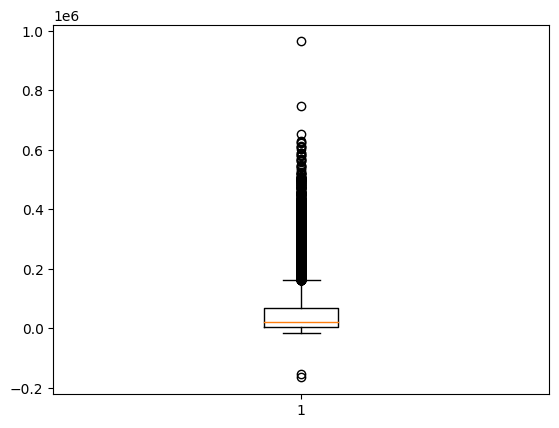

In [16]:
#cheking for outliers
plt.boxplot(data['BILL_AMT1'])
plt.show()

In [17]:
#taking all the features into a variable to loop throu later
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [18]:
#making a function to do outlier capping for all the features
def iqr_capping(data,cols):
  for col in cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)

    iqr = q3 - q1

    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr

    data[col] = np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))


In [19]:
#calling the function to do outlier capping for all the columns
iqr_capping(data,features)

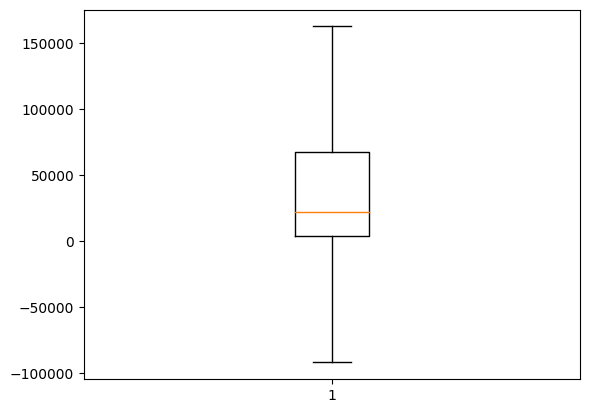

In [20]:
#checking whether capping worked or not
plt.boxplot(data['BILL_AMT1'])
plt.show()

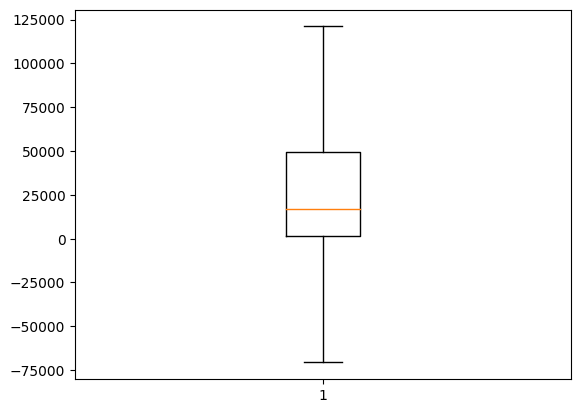

In [21]:
#cheking whether capping worked or not. it worked so moving forward
plt.boxplot(data['BILL_AMT6'])
plt.show()

# Encoding

In [22]:
# there are no categorical columns so no need for any encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  float64
 3   EDUCATION                   30000 non-null  float64
 4   MARRIAGE                    30000 non-null  float64
 5   AGE                         30000 non-null  float64
 6   PAY_1                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [23]:
#taking all the columns into x
x = data.drop(['ID','default payment next month'],axis=1)

In [24]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2.0,2.0,1.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0


In [25]:
# taking target column into y
y= data['default payment next month']

# Scaling

In [26]:
# checking the target column for scaling
data['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [27]:
# importing the standard scale library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [29]:
# using the loc function so that x does not get converted to an array
x.loc[:,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = sc.fit_transform(x[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

In [30]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.148083,0.810161,0.230777,-1.068199,-1.257372,1.674463,1.746729,-0.743681,-0.717876,-1.752244,...,-0.844489,-0.854980,-0.846067,-0.827978,-1.001158,-0.773703,-0.904708,-0.884502,-0.882842,-0.866920
1,-0.366901,0.810161,0.230777,0.861119,-1.037733,-0.951679,1.746729,0.260863,0.313506,0.358003,...,-0.801811,-0.778444,-0.759465,-0.745143,-1.001158,-0.685670,-0.606697,-0.559114,-0.882842,-0.228173
2,-0.601256,0.810161,0.230777,0.861119,-0.159179,0.098778,0.234293,0.260863,0.313506,0.358003,...,-0.568893,-0.519758,-0.471387,-0.433004,-0.566536,-0.544137,-0.606697,-0.559114,-0.559640,0.729948
3,-0.913728,0.810161,0.230777,-1.068199,0.170278,0.098778,0.234293,0.260863,0.313506,0.358003,...,0.196266,-0.192677,-0.120193,-0.077427,-0.428533,-0.397227,-0.547095,-0.526575,-0.537339,-0.547546
4,-0.913728,-1.234323,0.230777,-1.068199,2.366663,-0.951679,0.234293,-0.743681,0.313506,0.358003,...,-0.091878,-0.365165,-0.366162,-0.342014,-0.428533,2.215885,2.075405,2.043994,-0.660155,-0.650065


In [31]:
# importing the library for train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# KNN

In [32]:
# importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
# for different values of k finding the accuracy score
metric_k =[]
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [34]:
metric_k

[0.7728333333333334,
 0.7921666666666667,
 0.788,
 0.7951666666666667,
 0.793,
 0.798,
 0.7963333333333333,
 0.7983333333333333,
 0.7983333333333333,
 0.8011666666666667,
 0.799,
 0.8016666666666666]

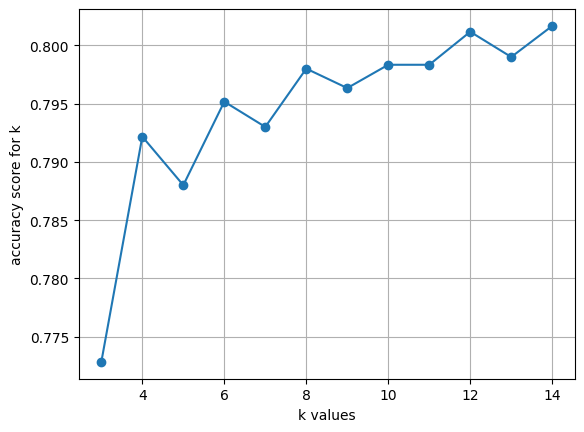

In [35]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy score for k')
plt.grid()

In [36]:
# highest accuacy score is for k value 14.
classifier = KNeighborsClassifier(n_neighbors = 14)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)

In [37]:
acc

0.8016666666666666

#SVM

In [38]:
# finding the accuracy score with svm model
from sklearn.svm import SVC
sv = SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_svc = sv.predict(x_test)
accuracy_svm = accuracy_score(y_test,y_pred_svc)


In [39]:
accuracy_svm

0.8135

#Gradient Boosting, Ada boosting, xgboost

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [41]:
models = {'Gradient Boosting': GradientBoostingClassifier(),
          'Ada Boosting': AdaBoostClassifier(),
          'Xgboost': XGBClassifier()}

In [42]:
for name,model in models.items():
  model.fit(x_train,y_train)
  print(name + ' Trained')

Gradient Boosting Trained
Ada Boosting Trained
Xgboost Trained


In [43]:
for name,model in models.items():
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print(f'{name} Accuracy score: {acc:.2f}')

Gradient Boosting Accuracy score: 0.82
Ada Boosting Accuracy score: 0.81
Xgboost Accuracy score: 0.81


# Hyperparameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameters = {'n_estimators': [100,200,300,400,500,600],
              'criterion':['friedman_mse','squared_error'],
              'max_depth':[10,20,30,40,50,60]}

In [46]:
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,cv=5,scoring = 'accuracy',n_jobs=-1)

In [48]:
grid_result = grid_search.fit(x_train,y_train)

In [ ]:
print('Best Parameters: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)